### In this code we will explore the Image Generator for automatically labelling the data in the subdirectories and train the data generated using Image Generator

In [32]:
# Download the dataset of Horse-human dataset
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 196MB/s]


In [33]:
# Download the validation set
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 43.5MB/s]


In [34]:
# The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data.
import os
import zipfile

local_zip = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/horse-or-human')


local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')

zip_ref.close()

In [35]:
# Explore the zipped files
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/content/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/content/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/content/validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse50-8.png', 'horse50-4.png', 'horse01-7.png', 'horse09-8.png', 'horse35-6.png', 'horse09-1.png', 'horse26-4.png', 'horse03-1.png', 'horse06-1.png', 'horse19-4.png']
['human15-01.png', 'human15-12.png', 'human13-11.png', 'human17-15.png', 'human17-27.png', 'human09-27.png', 'human09-02.png', 'human14-03.png', 'human13-07.png', 'human04-08.png']
['horse1-241.png', 'horse1-568.png', 'horse1-298.png', 'horse1-127.png', 'horse4-541.png', 'horse5-032.png', 'horse5-192.png', 'horse3-440.png', 'horse1-384.png', 'horse4-043.png']
['valhuman01-02.png', 'valhuman05-15.png', 'valhuman02-16.png', 'valhuman05-02.png', 'valhuman05-27.png', 'valhuman01-14.png', 'valhuman02-07.png', 'valhuman01-04.png', 'valhuman01-19.png', 'valhuman04-05.png']


In [36]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


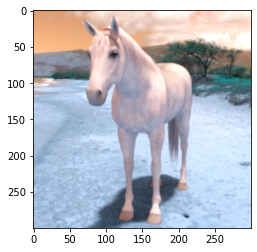

In [37]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("/content/horse-or-human/horses/horse01-0.png")
plt.imshow(img)

In [38]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


### Implementing the Model from scratch

In [39]:
import tensorflow as tf

In [40]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 35, 64)      

In [42]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
# Its dataNormalization
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300 x 300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [44]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 10s 1s/step - loss: 1.3312 - accuracy: 0.5962 - val_loss: 1.2675 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.7766 - accuracy: 0.6299 - val_loss: 0.7437 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.5346 - accuracy: 0.7052 - val_loss: 2.3708 - val_accuracy: 0.6406
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 1.0012 - accuracy: 0.7430 - val_loss: 0.5199 - val_accuracy: 0.7969
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.4244 - accuracy: 0.8621 - val_loss: 0.8523 - val_accuracy: 0.7852
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.3724 - accuracy: 0.8532 - val_loss: 1.2953 - val_accuracy: 0.7695
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.2200 - accuracy: 0.9199 - val_loss: 0.8926 - val_accuracy: 0.7969
Epoch 8/15
8/8 [========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


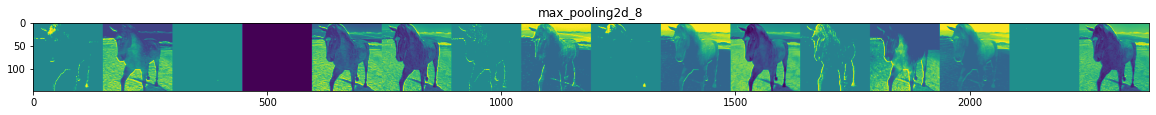

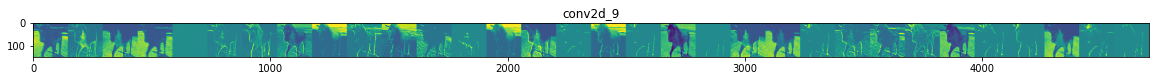

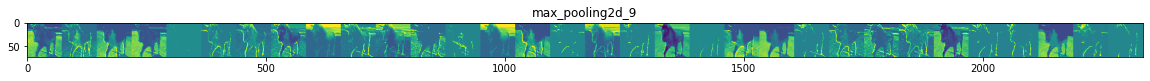

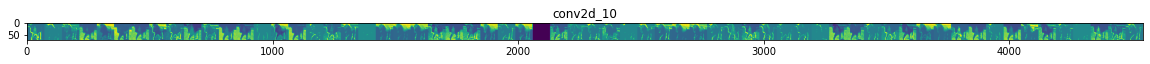

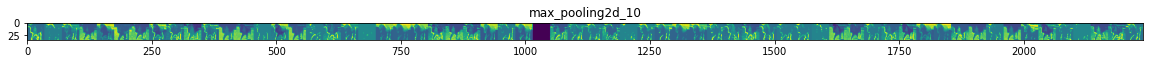

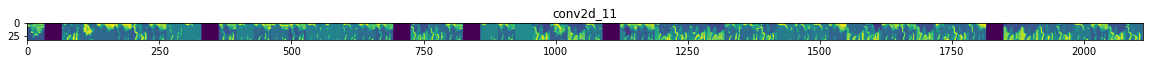

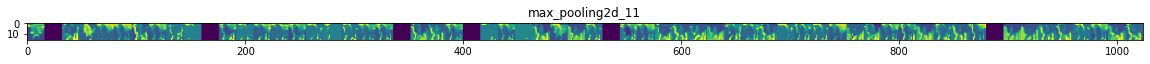

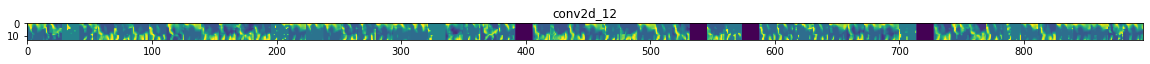

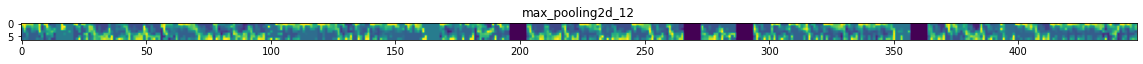

In [45]:
# Visualization of the filters
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [46]:
# Real Time prediction on real images
from keras.preprocessing import image
path = "/content/white-horse-gd4b5782b8_640.jpg"
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
print(model.predict(images))



[[0.]]


In [47]:
model.predict(images)

array([[0.]], dtype=float32)